# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smart, Mr. John Montgomery",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

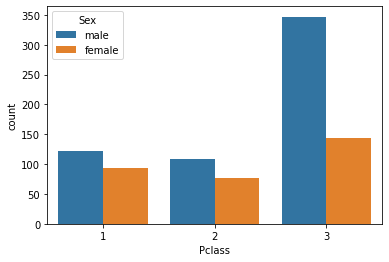

In [9]:
sns.countplot('Pclass',hue = 'Sex',data=train);

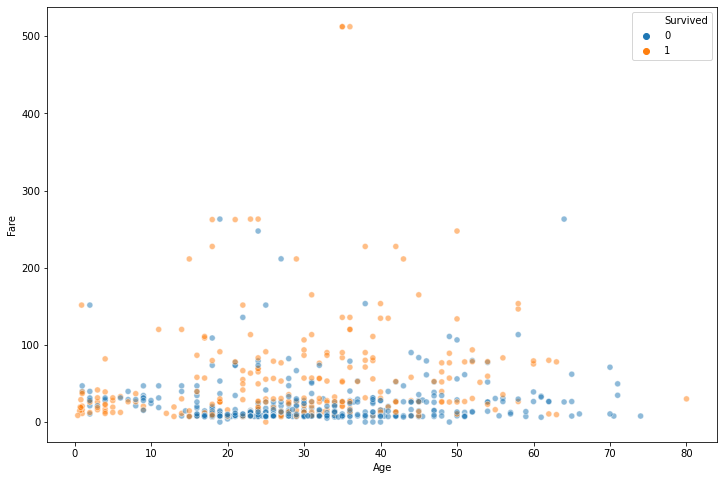

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot('Age','Fare',hue = 'Survived',data=train,alpha=0.5);

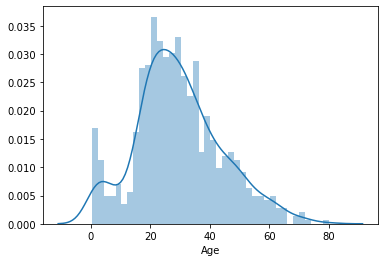

In [11]:
sns.distplot(train['Age'],bins=40);

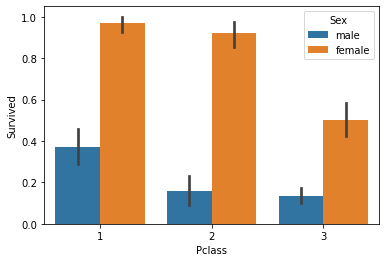

In [12]:
sns.barplot('Pclass','Survived',data = train,hue='Sex');

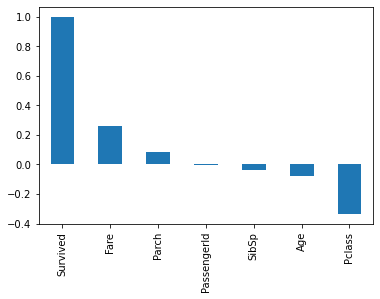

In [13]:
train.corr().Survived.sort_values(ascending = False).plot(kind='bar');

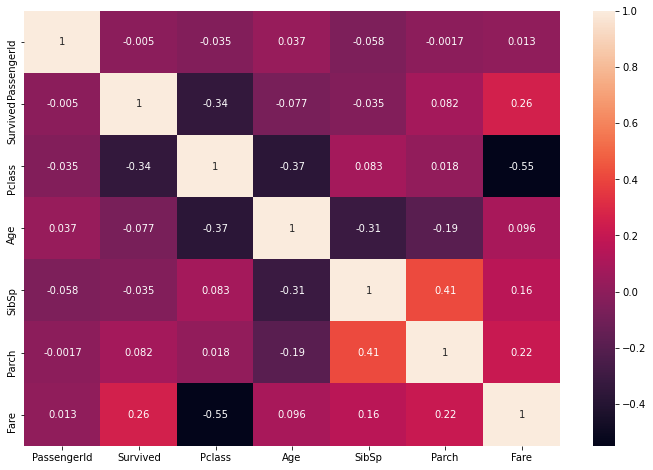

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True);

# Data Preprocessing

In [15]:
train['Embarked'].value_counts().head(1)

S    644
Name: Embarked, dtype: int64

In [16]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
C106           1
C49            1
A36            1
E38            1
E40            1
Name: Cabin, Length: 147, dtype: int64

In [17]:
train.Age.median()

28.0

In [18]:
data = [train,test]

In [19]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
#Separating features and labels in training data
X_train = train.drop(['Survived','Ticket','Cabin','Name','PassengerId'],axis = 1)
X_train_pass = train['PassengerId']
y_train = train['Survived']

#repeating for test data
X_test = test.drop(['Ticket','Cabin','Name','PassengerId'],axis = 1)
X_test_pass = test['PassengerId']


# Feature Scaling

In [23]:
int_cols = X_train.select_dtypes(include=['int64','float64']).columns
X_int_train = X_train.select_dtypes(include=['int64','float64'])
obj_cols = X_train.select_dtypes(include=['object']).columns
X_obj_train = X_train.select_dtypes(include=['object'])
print(int_cols)
print(obj_cols)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


In [24]:
X_int_test = X_test.select_dtypes(include=['int64','float64'])
X_obj_test = X_test.select_dtypes(include=['object'])

### Transforming object type data in test set

In [25]:
X_obj_test.Sex = X_obj_test.Sex.map({'female':0,'male':1})

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
X_obj_test.Embarked = X_obj_test.Embarked.map({'S':2,'C':0,'Q':1})

In [27]:
X_obj_test

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
413,1,2
414,0,0
415,1,2
416,1,2


In [28]:
X_obj_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sex       418 non-null    int64
 1   Embarked  418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_obj_train = X_obj_train.apply(encoder.fit_transform)
X_obj_train = pd.DataFrame(X_obj_train,columns=obj_cols)
X_obj_test = pd.DataFrame(X_obj_test,columns=obj_cols)

In [30]:
X_obj_test

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
413,1,2
414,0,0
415,1,2
416,1,2


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_int_train = scaler.fit_transform(X_int_train)
X_int_test = scaler.transform(X_int_test)
X_int_train = pd.DataFrame(X_int_train,columns= int_cols )
X_int_test = pd.DataFrame(X_int_test,columns= int_cols )

In [32]:
X_train = pd.concat([X_int_train,X_obj_train],axis = 1)
X_test = pd.concat([X_int_test,X_obj_test],axis = 1)

In [33]:
X_test.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

# Model Creation

In [34]:
#from sklearn.model_selection import train_test_split
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

class_knn = KNeighborsClassifier()
class_knn.fit(X_train,y_train)
class_knn.predict(X_test)

class_svc = SVC()
class_svc.fit(X_train,y_train)
class_svc.predict(X_test)

class_BNB = BernoulliNB()
class_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

class_BNB.fit(X_train,y_train)
class_BNB.predict(X_test)

class_tree.fit(X_train,y_train)
class_tree.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# Evaluation on train set

In [37]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

models = []

models.append(('Random Forest Classifier',classifier))
models.append(('KNeighborsClassifier',class_knn))
models.append(('SVC',class_svc))
models.append(('BernoulliNB',class_BNB))
models.append(('Decision tree',class_tree))

print('-------------------------------------------------Evaluation metrics------------------------------------------------- \n \n')

for name, model in  models:
    print(f'--------- {name} --------')
    print()
    print('f1-score \n', f1_score(y_train,model.predict(X_train)))
    print()
    print('Confusion matrix \n' , confusion_matrix(y_train,model.predict(X_train)))
    print()
    print('Accuracy \n' ,accuracy_score(y_train,model.predict(X_train)))
    print()
    print('-----------------------------------------------------------------')
    print()
    

-------------------------------------------------Evaluation metrics------------------------------------------------- 
 

--------- Random Forest Classifier --------

f1-score 
 0.973529411764706

Confusion matrix 
 [[542   7]
 [ 11 331]]

Accuracy 
 0.9797979797979798

-----------------------------------------------------------------

--------- KNeighborsClassifier --------

f1-score 
 0.7976190476190476

Confusion matrix 
 [[487  62]
 [ 74 268]]

Accuracy 
 0.8473625140291807

-----------------------------------------------------------------

--------- SVC --------

f1-score 
 0.7708978328173375

Confusion matrix 
 [[494  55]
 [ 93 249]]

Accuracy 
 0.8338945005611672

-----------------------------------------------------------------

--------- BernoulliNB --------

f1-score 
 0.6746268656716418

Confusion matrix 
 [[447 102]
 [116 226]]

Accuracy 
 0.755331088664422

-----------------------------------------------------------------

--------- Decision tree --------

f1-score 
 0.9731

In [38]:
import keras

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import Callback

In [40]:
model = Sequential()
model.add(Dense(7,activation = 'relu'))

model.add(Dense(7,activation ='relu'))

model.add(Dense(1,activation = 'sigmoid'))

In [41]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [42]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.6083
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6207
Epoch 3/100
28/28 [==============================] - 0s 942us/step - loss: 0.6619 - accuracy: 0.6442
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6622
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.6768
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.6891
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.6914
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.6970
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.7059
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5661 - accuracy: 0.7104
Epoch 1

In [43]:
acc = accuracy_score(y_train,model.predict_classes(X_train))
cm =confusion_matrix(y_train,model.predict_classes(X_train))

In [44]:
acc

0.8305274971941639

In [45]:
cm

array([[491,  58],
       [ 93, 249]])

## Random Forest had the best accuracy,fitting it on test set

In [46]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
y_pred.shape

(418,)

In [48]:
X_test_pass.shape

(418,)

In [49]:
output = pd.DataFrame({'PassengerID': X_test_pass,'Survived':y_pred})
output.to_csv('my_submission.csv',index=False)

In [50]:
output.head(10)

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
